In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [87]:
twitter_df = pd.read_csv("twitter_data/DKNG_tweets.csv")
stock_df = pd.read_csv("stock_data/DKNG.csv")

In [88]:
stock_df['% change tomorrow'] = -stock_df[['Close']].pct_change(periods=-1)
stock_df = stock_df.dropna()
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df.head()

,Date,Open,High,Low,Close,Volume,% change tomorrow
0,2020-10-07,52.860001,54.880001,52.200001,53.330002,65474600,-0.043028
1,2020-10-08,54.158001,54.779999,50.610001,51.130001,37242500,-0.047317
2,2020-10-09,50.750000,51.700001,48.259998,48.820000,29572800,0.035178
3,2020-10-12,51.009998,52.520000,50.330002,50.599998,31713500,0.011333
4,2020-10-13,50.849998,51.400002,49.525002,51.180000,19134200,-0.076114


In [89]:
# getting the dates in order
twitter_df["datetime"] = twitter_df[['timestamp']].apply(datetime.fromtimestamp,axis=1)
twitter_df['date'] = twitter_df['datetime'].dt.date

In [90]:
#adding sentiment in
analyzer = SentimentIntensityAnalyzer()
twitter_df["sentiment_scores"] = twitter_df[['text']].apply(analyzer.polarity_scores,axis=1)
twitter_df["sentiment"] = twitter_df[['text']].apply(lambda x: analyzer.polarity_scores(x)['compound'],axis=1)

In [91]:
twitter_df.tail()

,name,timestamp,likes,isretweet,isreply,text,retweets,replies,datetime,date,sentiment_scores,sentiment
2473,mattkalish,1506724551,6,False,False,🤦‍♂️ https://t.co/CKl8eqkgtl,0,0,2017-09-29 17:35:51,2017-09-29,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2474,mattkalish,1506718952,0,True,False,RT @DF_Advantage: It's almost time #DraftKings...,1,0,2017-09-29 16:02:32,2017-09-29,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2475,mattkalish,1506709165,6,False,False,More winners of the #DraftKingsPizzaChallenge ...,1,2,2017-09-29 13:19:25,2017-09-29,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.7569
2476,mattkalish,1506701462,4,False,False,More winners of the #DraftKingsPizzaChallenge!...,0,3,2017-09-29 11:11:02,2017-09-29,"{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'comp...",0.5697
2477,mattkalish,1506695306,3,False,False,First batch of new #DraftKingsPizzaChallenge w...,1,7,2017-09-29 09:28:26,2017-09-29,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.7339


# Simple analysis

In [93]:
#this might not be too telling since there has been a lot of spam posts of late 
#(maybe filter to get rid of posts that seem like spam)
means = twitter_df[["likes", "retweets", "replies", "sentiment", "date"]].groupby(['date']).mean()
means

,likes,retweets,replies,sentiment
date,,,,
2017-02-27,132.000000,985.000000,16.500000,0.456800
2017-02-28,30.500000,3.000000,4.500000,0.780950
2017-03-01,24.000000,1.500000,5.000000,0.220200
2017-03-03,9.500000,0.500000,0.500000,0.835650
2017-03-07,0.000000,7.000000,0.000000,0.000000
...,...,...,...,...
2021-03-03,20.055556,5.277778,3.222222,0.024439
2021-03-04,22.230769,83.153846,6.615385,0.251838
2021-03-05,59.928571,14.857143,4.428571,0.267100


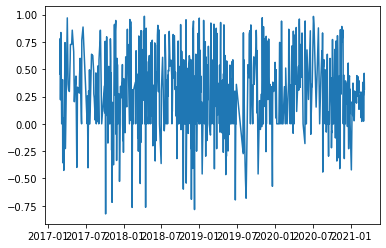

In [95]:
plt.plot(means['sentiment'])

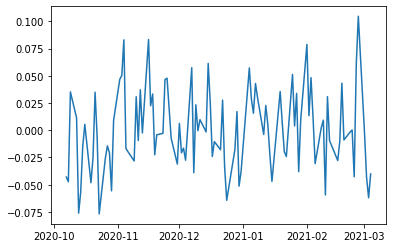

In [97]:
#filtered_for_recent = stock_df[stock_df.Date >= np.datetime64(datetime(2020, 10, 8).date())]
plt.plot(stock_df.set_index('Date')["% change tomorrow"])

In [98]:
merged = pd.merge(stock_df, twitter_df, left_index=True, right_index=True)

In [100]:
merged['sentiment'].corr(merged['% change tomorrow'])

0.035857132251033916

# :( not good results with just this (should filter out spam though)